# Import necessary packages and Bring the sample image

In [1]:
# necessary packages
import matplotlib.pyplot as plt
import cv2
import os, glob
import numpy as np

# read the sample image of the tactile pavement as a numpy array
# 'linear.jpg' can also be used instead of 'spotted.jpg'
upstate = cv2.imread('./spotted.jpg')

In [2]:
# convert the color to HLS
upstate_hls = cv2.cvtColor(upstate, cv2.COLOR_BGR2HLS)

# Masking with a binary threshold

because tactile pavements are yellow, we will extract the pixels that are within 'yellow range'

In [3]:
# these are the yellow color mask using the RGB channels
# for each 'lower' and 'upper', the first number indicates 'red', the second for 'green', and the last for 'blue' code
lower = np.uint8([ 10,   0, 100])
upper = np.uint8([ 40, 255, 255])

# get mask of pixels that are in yellow range
mask = cv2.inRange(upstate_hls, lower, upper)

# inverse mask to get parts that are not blue
mask_inverse = cv2.bitwise_not(mask)

# convert single channel mask back into 3 channels
# yellow part on the image will be converted into white and the rest will be converted into black
mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)

Check out what we've done so far!

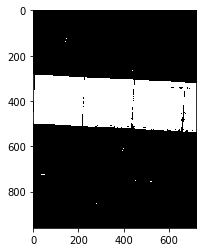

In [4]:
# you can always try out 'plt.imshow()' to check what you're doing
plt.imshow(mask_rgb)

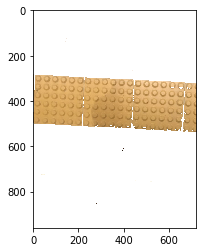

In [5]:
# perform bitwise and on mask to obtain cut-out image that is not yellow
masked_upstate = cv2.bitwise_and(upstate, mask_rgb)

# replace the cut-out parts with white
masked_replace_white = cv2.addWeighted(masked_upstate, 1, \
                                       cv2.cvtColor(mask_inverse, cv2.COLOR_GRAY2RGB), 1, 0)

# the tactile pavement has now been detected and change it from BGR to RGB
plt.imshow(cv2.cvtColor(masked_replace_white, cv2.COLOR_BGR2RGB))
onlyyellowpart = cv2.cvtColor(masked_replace_white, cv2.COLOR_BGR2RGB)

In [16]:
# convert RGB to grayscale
onlyyellowtogray = cv2.cvtColor(onlyyellowpart, cv2.COLOR_RGB2GRAY)

# smooth the image
cimg = cv2.medianBlur(onlyyellowtogray, 5)

# Classify the tactile pavement

In [6]:
# detect circles of whice radius is within the range of 0 to 50 in the image
# cv2.HOUGH_GRADIENT is a method to detect circles in the image
# '1' indicates the inverse ratio of the accumulator resolution to the image resolution
circles = cv2.HoughCircles(cimg, cv2.HOUGH_GRADIENT, 1, 10,param1=50,param2=25,minRadius=0, maxRadius=50)
circles = np.uint16(np.around(circles))

# classify the tactile pavement; whether it is spotted or linear
if circles is not None:
        circles = np.uint16(np.around(circles))
        numofcircles =[]

        for i in circles[0,:]:
            cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
            cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
            numofcircles.append(i)
        
        # if more or equal to 50 number of circles are detected, it's a spotted tactile pavement
        if len(numofcircles) >= 50:
            print ("Stop!")
        
        # else, it may be a linear tactile pavement so we will now count the number of lines
        else:
            # the first commented line beneath uses 'sobel' detector to detect lines
            # the second commented line beneath uses 'laplacian' detector 
            # the last hough transforms the image to detect lines
            # I implemented all three, but the last was the most efficient detector to detect lines in real time
            
            #lines = cv2.HoughLines(sobelx,1,np.pi/180,100)  #19708
            #lines = cv2.HoughLines(laplacian,1,np.pi/180,100)  #22809
            lines = cv2.HoughLines(edges,1,np.pi/180,100)    #5057
            
            # count the number of lines in the image to detect if it's a linear tactile pavement
            if lines is not None:
                for i in xrange(len(lines)):
                    for rho,theta in lines[0]:
                        a = np.cos(theta)
                        b = np.sin(theta)
                        x0 = a*rho
                        y0 = b*rho
                        x1 = int(x0 + 1000*(-b))
                        y1 = int(y0 + 1000*(a))
                        x2 = int(x0 - 1000*(-b))
                        y2 = int(y0 - 1000*(a))
                        cv2.line(onlyyellowtogray,(x1,y1),(x2,y2),(0,0,255),2)


# count the number of circles in the image
numofcircles =[]

for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of circles
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
    numofcircles.append(i)

"\ncv2.imshow('img', cimg)\ncv2.waitKey(0)\ncv2.destroyAllWindows()\n"

# Show circles and their centers 

In [ ]:
if circles is not None:
        circles = np.uint16(np.around(circles))
        numofcircles =[]

        for i in circles[0,:]:
            cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
            cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
            numofcircles.append(i)
        
        if len(numofcircles) >= 50:
            print ("warning")
            #print len(numofcircles)
   
        
        else:
            #lines = cv2.HoughLines(sobelx,1,np.pi/180,100)  #19708
            lines = cv2.HoughLines(edges,1,np.pi/180,100)    #5057
            #lines = cv2.HoughLines(laplacian,1,np.pi/180,100)  #22809
            
            if lines is not None:
                for i in xrange(len(lines)):
                    for rho,theta in lines[0]:
                        a = np.cos(theta)
                        b = np.sin(theta)
                        x0 = a*rho
                        y0 = b*rho
                        x1 = int(x0 + 1000*(-b))
                        y1 = int(y0 + 1000*(a))
                        x2 = int(x0 - 1000*(-b))
                        y2 = int(y0 - 1000*(a))
                        cv2.line(onlyyellowtogray,(x1,y1),(x2,y2),(0,0,255),2)
    


In [12]:
circles[0:10]

array([[[494, 400,  14],
        [460, 324,  15],
        [568, 404,  14],
        [352, 320,  14],
        [170, 346,  14],
        [242, 314,  14],
        [686, 336,  14],
        [ 96, 342,  14],
        [184, 334,  39],
        [172, 310,  15],
        [542, 498,  30],
        [314, 354,  14],
        [606, 406,  14],
        [274, 428,  13],
        [570, 368,  14],
        [532, 366,  14],
        [ 92, 416,  13],
        [126, 454,  14],
        [206, 348,   8],
        [422, 396,  14],
        [566, 442,  14],
        [208, 310,   8],
        [498, 326,  14],
        [350, 356,  14],
        [596, 340,  27],
        [ 94, 380,  14],
        [382, 432,  14],
        [388, 356,   8],
        [454, 434,  15],
        [166, 384,  14],
        [312, 392,  13],
        [652, 332,  18],
        [536, 328,  15],
        [604, 444,  14],
        [682, 410,   8],
        [ 20, 302,  17],
        [134, 308,  14],
        [276, 390,  14],
        [166, 420,  13],
        [642, 410,  12],


In [10]:
len(numofcircles)

91

In [ ]:
#https://codewords.recurse.com/issues/six/image-processing-101
import matplotlib.pyplot as plt

import cv2
import os, glob
import numpy as np


upstate = cv2.imread('C:/Users/Administrator/Documents/blind_cane/smartcane/hey.jpg')


upstate_hls = cv2.cvtColor(upstate, cv2.COLOR_BGR2HLS)

# show pixels whose RGB codes are between yellow range and hide others
lower = np.uint8([ 10,   0, 100])
upper = np.uint8([ 40, 255, 255])

mask = cv2.inRange(upstate_hls, lower, upper)
mask_inverse = cv2.bitwise_not(mask)
mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
masked_upstate = cv2.bitwise_and(upstate, mask_rgb)
masked_replace_white = cv2.addWeighted(masked_upstate, 1, \
                                       cv2.cvtColor(mask_inverse, cv2.COLOR_GRAY2RGB), 1, 0)

onlyyellowpart = cv2.cvtColor(masked_replace_white, cv2.COLOR_BGR2RGB)
onlyyellowtogray = cv2.cvtColor(onlyyellowpart, cv2.COLOR_RGB2GRAY)

cimg = cv2.medianBlur(onlyyellowtogray, 5)

circles = cv2.HoughCircles(cimg, cv2.HOUGH_GRADIENT, 1, 10,param1=50,param2=25,minRadius=0, maxRadius=50)

circles = np.uint16(np.around(circles))

numofcircles =[]


for i in circles[0,:]:
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
    numofcircles.append(i)

print len(numofcircles)

cv2.imshow('img', cimg)
cv2.waitKey(0)
cv2.destroyAllWindows()